# Public API Visualization Task

In this notebook we'll use a public API from this [repo](https://github.com/public-apis/public-apis) to visualize the data. The API we'll use is the [Weather API](https://github.com/robertoduessmann/weather-api). 

## Getting the data

The weather API returns the forecast in the following schema
```{'temperature': '+9 °C',
 'wind': '7 km/h',
 'description': 'Sunny',
 'forecast': [{'day': '1', 'temperature': '+13 °C', 'wind': '9 km/h'},
  {'day': '2', 'temperature': '11 °C', 'wind': '9 km/h'},
  {'day': '3', 'temperature': '+8 °C', 'wind': '27 km/h'}]}

In [2]:
import requests
import json

In [10]:
api_url = 'https://goweather.herokuapp.com/weather/%s' # %s is a placeholder for the city name
cities = ['istanbul', 'izmir', 'ankara', 'bursa', 'antalya', 'konya', 'gaziantep'] # list of cities we have branches in

In [25]:
""""
city = 'istanbul'
response = requests.get(api_url % city).json()
print(response)
temperature_forecasts = [day['temperature'] for day in response['forecast']]
temperature_forecasts = [int(response['temperature'][:-2]) for temperature in temperature_forecasts]
"""

{'temperature': '+7 °C', 'wind': '31 km/h', 'description': 'Light rain shower', 'forecast': [{'day': '1', 'temperature': '+8 °C', 'wind': '35 km/h'}, {'day': '2', 'temperature': '5 °C', 'wind': '30 km/h'}, {'day': '3', 'temperature': ' °C', 'wind': '19 km/h'}]}


In [7]:
def get_3day_wind_forecasts(city):
    response = requests.get(api_url % city).json()
    wind_forecasts = [day['wind'] for day in response['forecast']]
    print(wind_forecasts)
    wind_forecasts = [int(wind[:-4]) for wind in wind_forecasts]
    return wind_forecasts

get_3day_wind_forecasts('istanbul')

['35 km/h', '30 km/h', '19 km/h']


[35, 30, 19]

In [ ]:
"""
def get_3day_temperature_forecasts(city):
    response = requests.get(api_url % city).json()
    temperature_forecasts = [day['temperature'] for day in response['forecast']]
    print(temperature_forecasts)
    temperature_forecasts = [int(temperature[:-2]) for temperature in temperature_forecasts]
    return temperature_forecasts

get_3day_temperature_forecasts('istanbul')
"""

In [11]:
forecasts = {}
for city in cities:
    forecasts[city] = get_3day_wind_forecasts(city)

['35 km/h', '30 km/h', '19 km/h']
['19 km/h', '15 km/h', '14 km/h']
['13 km/h', '5 km/h', '15 km/h']
['11 km/h', '6 km/h', '4 km/h']
['9 km/h', '9 km/h', '18 km/h']
['11 km/h', '9 km/h', '18 km/h']
['9 km/h', '41 km/h', '15 km/h']


In [12]:
forecasts

{'istanbul': [35, 30, 19],
 'izmir': [19, 15, 14],
 'ankara': [13, 5, 15],
 'bursa': [11, 6, 4],
 'antalya': [9, 9, 18],
 'konya': [11, 9, 18],
 'gaziantep': [9, 41, 15]}

## Visualize the forecast for the next 3 days.

In [8]:
'!pip install matplotlib'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 679.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 446.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 538.0 kB/s eta 0:00:00a 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 104.0 kB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 426.7 kB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


In [13]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta

In [17]:
""" 
y = forecasts['istanbul']
 print(y)
 today = dt.today().isoformat()[:10]
 print(today)
 a_day = timedelta(days=1)

 x = [dt.today() + (1*a_day), dt.today() + (2*a_day), dt.today() + (3*a_day)]
 days = [day.isoformat()[:10] for day in x]
 print(days)
 """

[35, 30, 19]
2023-03-17
['2023-03-18', '2023-03-19', '2023-03-20']


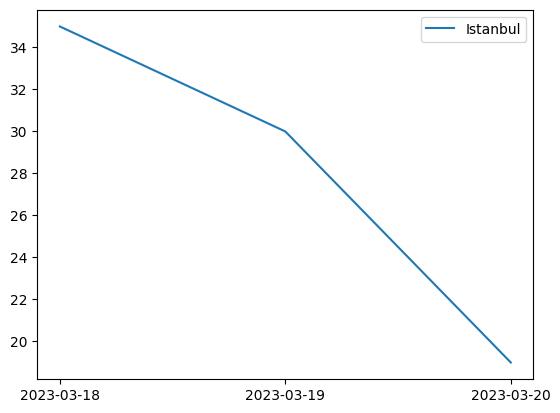

In [18]:
#plt.plot(days, y, label='Istanbul')
#plt.legend()
#plt.show()

C:\Users\ahmet\AppData\Local\Temp\ipykernel_24032\3528651241.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


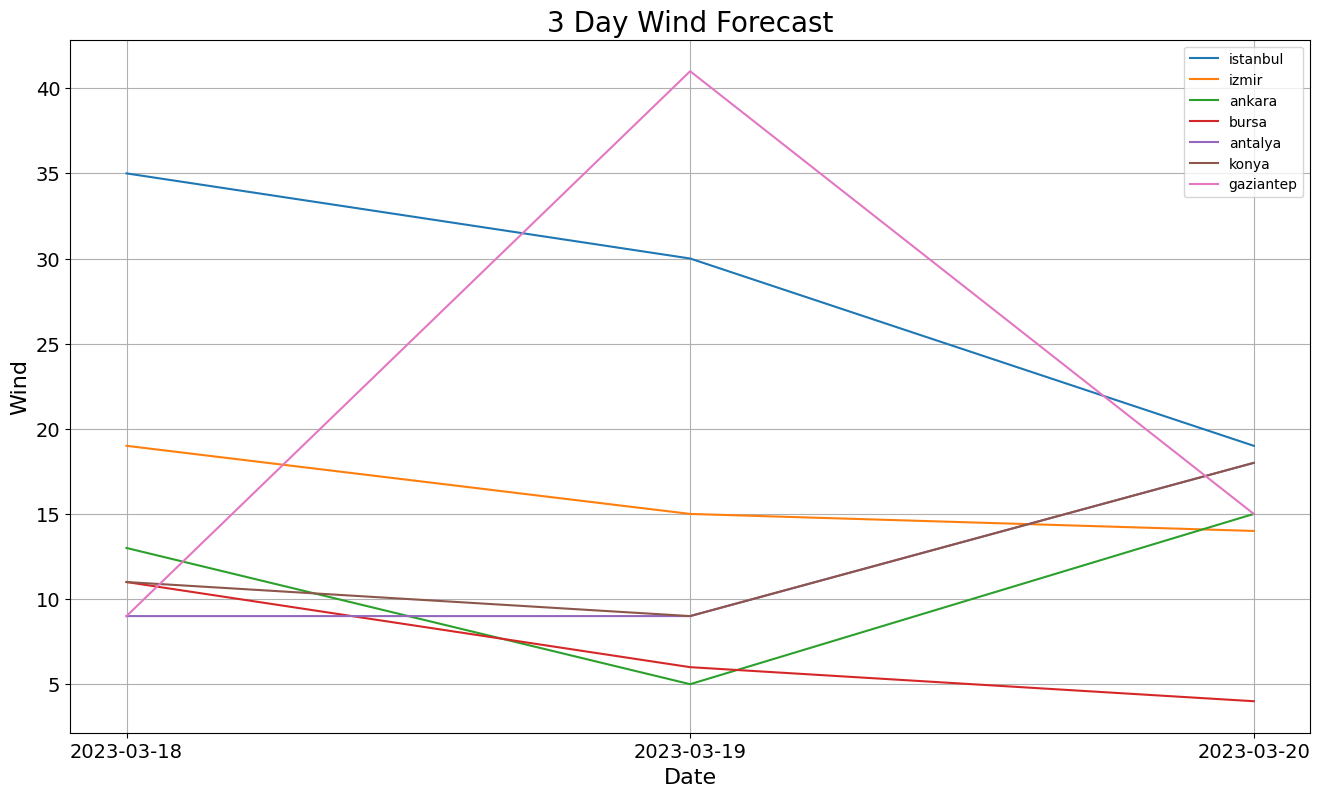

In [14]:
a_day = timedelta(days=1)
days = [dt.today() + (1*a_day), dt.today() + (2*a_day), dt.today() + (3*a_day)]
x = [day.isoformat()[:10] for day in days]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('3 Day Wind Forecast', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Wind', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(True)

for city, forecast in forecasts.items():
    ax.plot(x, forecast, label=city)

ax.legend()
fig.show()

saving this figure as a png file to add on the presentation

In [19]:
today = dt.today().isoformat()[:10]
fig.savefig(f'wind_forecasts_as_of_{today}.png')